In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
plt.style.use('seaborn')

## Generate Data

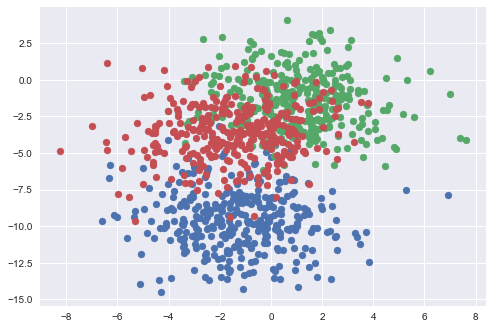

In [16]:
# generate 2d classification datasets
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
    
    # select indices of points with the class label
    row_ix = np.where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show plot
plt.show()

In [4]:
# one hot encode output variable
y = to_categorical(y)

# split into train and valid
n_train = 500

trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

## Create Simple MLP Model

In [6]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, lrate):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lrate='+str(lrate))
    plt.legend()

## Apply Learning Rate

In [7]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

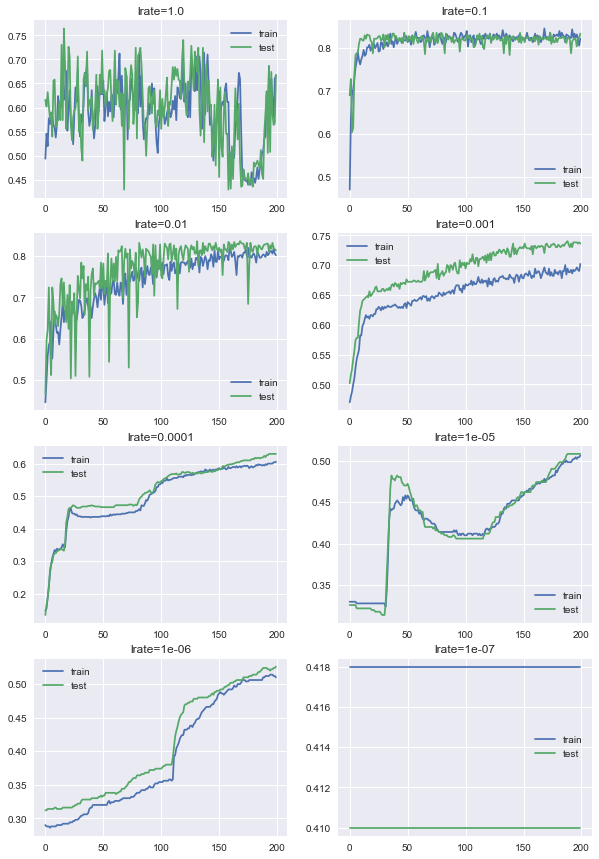

In [7]:
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(trainX, trainy, validX, validy, learning_rates[i])

# show learning curves
plt.show()

## Apply Momentum (lr=0.01)

In [9]:
# fit a model and plot learning curve
def fit_model_with_momentum(trainX, trainy, validX, validy, momentum):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum))
    plt.legend()

In [11]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0

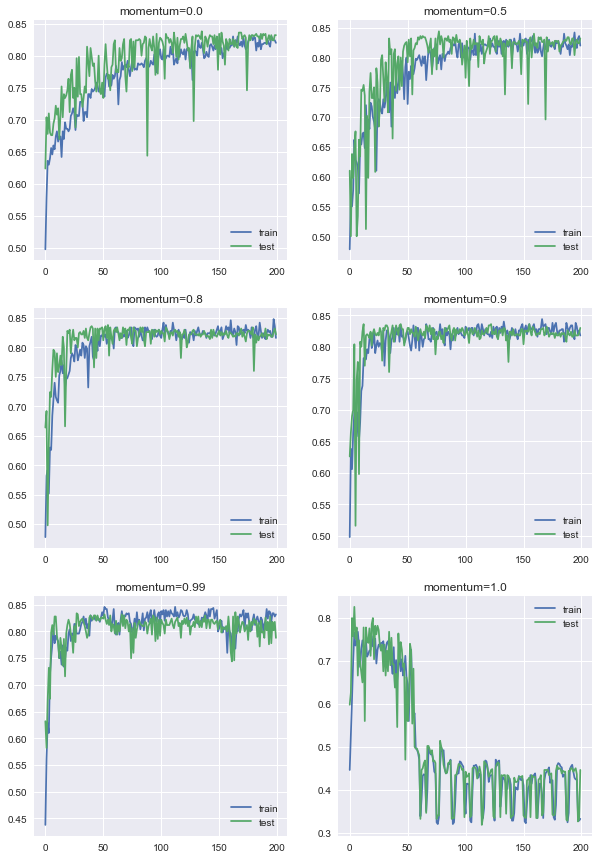

In [10]:
plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(trainX, trainy, validX, validy, momentums[i])

# show learning curves
plt.show()

## Apply Learning Rate Decay (lr=0.01)

In [12]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

In [13]:
# create learning curves for different decay
global_decays = [1E-1, 1E-2, 1E-3, 1E-4]
local_decays = [1E-2, 3E-2, 5E-2, 7E-2, 9E-2, 1E-1]

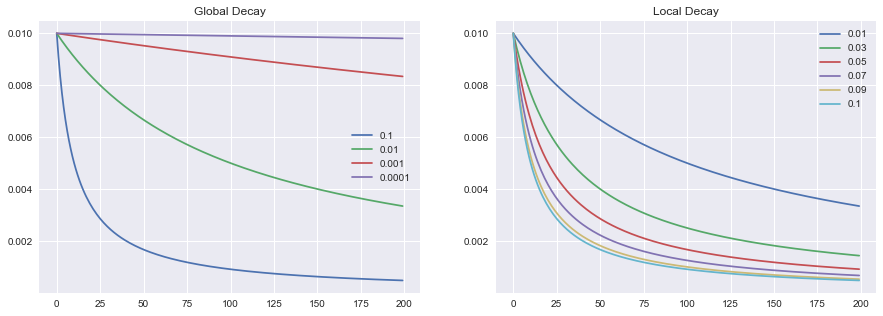

In [14]:
lrate = 0.01
n_updates = 200

plt.figure(figsize=(15, 5))

# set number plot
plt.subplot(121)
    
for decay in global_decays:
    
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    
    # plot result
    plt.plot(lrates, label=str(decay))
    plt.title('Global Decay')
    plt.legend()
    
# set number plot
plt.subplot(122)

for decay in local_decays:
    
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    
    # plot result
    plt.plot(lrates, label=str(decay))
    plt.title('Local Decay')
    plt.legend()
    
plt.show()

In [14]:
# fit a model and plot learning curve
def fit_model_with_decay(trainX, trainy, validX, validy, decay):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('decay='+str(decay))
    plt.legend()

In [15]:
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]

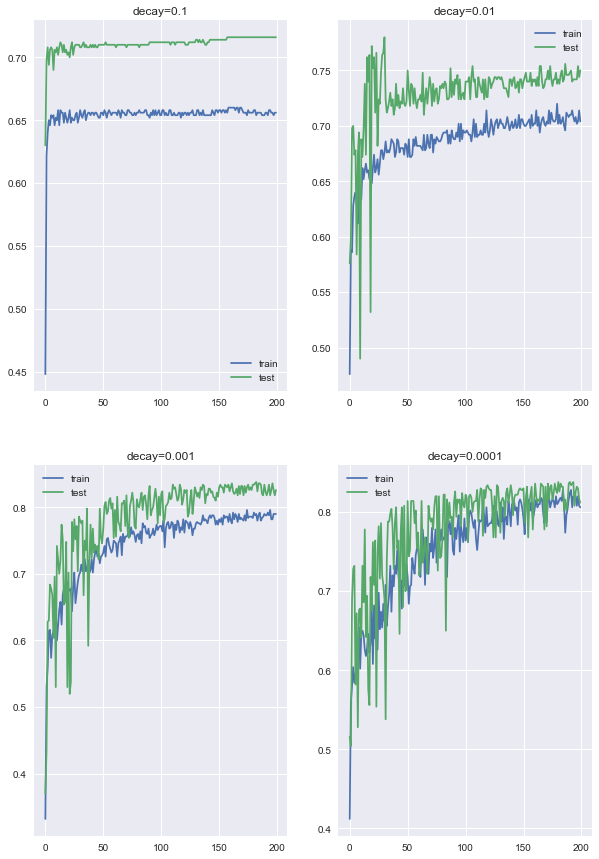

In [16]:
plt.figure(figsize=(10, 15))
for i in range(len(decay_rates)):

    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a decay rate
    fit_model_with_decay(trainX, trainy, validX, validy, decay_rates[i])

# show learning curves
plt.show()

## Apply Adaptive Learning Rate (lr=0.01)

In [17]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, optimizer):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('opt='+optimizer)
    plt.legend()

In [18]:
# create learning curves for different optimizers
momentums = ['sgd', 'rmsprop', 'adagrad', 'adam']

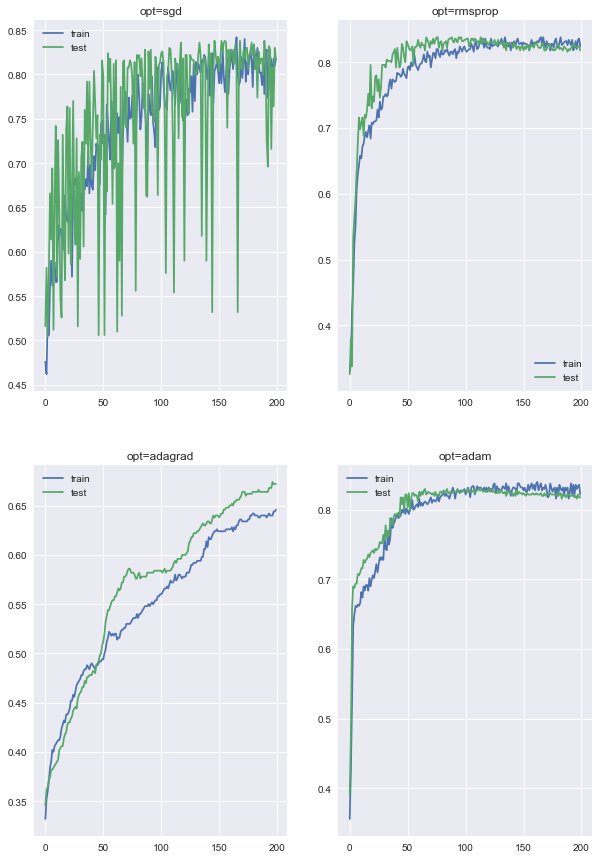

In [19]:
plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for an optimizer
    fit_model(trainX, trainy, validX, validy, momentums[i])
    
# show learning curves
plt.show()

---